In [28]:
import pandas as pd
import numpy as np
import json, os
import seaborn as sns
import matplotlib.pyplot as plt
import glob

%matplotlib inline

# 출력 데이터를 깔끔하게 표시하기 위해
import warnings
warnings.filterwarnings('ignore')

In [29]:
os.getcwd()

'C:\\Users\\t3q_dhkim\\Documents\\Intern'

### 데이터 미리보기

In [30]:
df = pd.read_json('022.요약문 및 레포트 생성 데이터\\01.데이터\\1.Training\\라벨링데이터\\TL1\\01.news_r\\20per\\REPORT-news_r-00001-00001.json')
df

,Meta(Acqusition),Meta(Refine),Annotation
doc_id,REPORT-news_r-00001,NaN,NaN
doc_category,REPORT,NaN,NaN
doc_type,news_r,NaN,NaN
doc_name,"40억달러 딜 주인공 김봉진 ""국내서 폼잡다 죽고싶지 않았다""",NaN,NaN
author,김선영,NaN,NaN
publisher,중앙일보,NaN,NaN
publisher_year,2020,NaN,NaN
doc_origin,중앙일보,NaN,NaN
passage_id,NaN,REPORT-news_r-00001-00001,NaN
passage,NaN,40억 달러 ‘딜’ 주인공 김봉진 우아한형제들 대표태풍 뒤의 고요함이랄까.\n 4...,NaN


In [31]:
meta_data = {
    "doc_type": df["Meta(Acqusition)"]["doc_type"],
    "doc_name": df["Meta(Acqusition)"]["doc_name"],
    "passage_id": df["Meta(Refine)"]["passage_id"],
    "passage": df["Meta(Refine)"]["passage"]
}

new = pd.DataFrame([meta_data])
new

,doc_type,doc_name,passage_id,passage
0,news_r,"40억달러 딜 주인공 김봉진 ""국내서 폼잡다 죽고싶지 않았다""",REPORT-news_r-00001-00001,40억 달러 ‘딜’ 주인공 김봉진 우아한형제들 대표태풍 뒤의 고요함이랄까.\n 4...


### 전처리를 위한 데이터 병합

빠른 계산을 위해 각 카테고리에서 100개의 파일 경로 추출

In [32]:
# 1.0 Training 학습세트에서 100개씩 추출
folders = [
    '01.news_r',
    '02.briefing',
    '03.his_cul',
    '04.paper',
    '05.minute',
    '06.edit',
    '07.public',
    '08.speech',
    '09.literature',
    '10.narration'
    
]

file_limit = 100
file_paths = []

for folder in folders:
    folder_path = f'022.요약문 및 레포트 생성 데이터\\01.데이터\\1.Training\\라벨링데이터\\TL1\\{folder}\\2~3sent\\*.json'
    files = glob.glob(folder_path)[:file_limit]
    file_paths.extend(files)

# Print the resulting file paths
#for file_path in file_paths:
#    print(file_path)
len(file_paths)
file_paths[:4]

['022.요약문 및 레포트 생성 데이터\\01.데이터\\1.Training\\라벨링데이터\\TL1\\01.news_r\\2~3sent\\REPORT-news_r-00007-00001.json',
 '022.요약문 및 레포트 생성 데이터\\01.데이터\\1.Training\\라벨링데이터\\TL1\\01.news_r\\2~3sent\\REPORT-news_r-00018-00001.json',
 '022.요약문 및 레포트 생성 데이터\\01.데이터\\1.Training\\라벨링데이터\\TL1\\01.news_r\\2~3sent\\REPORT-news_r-00020-00002.json',
 '022.요약문 및 레포트 생성 데이터\\01.데이터\\1.Training\\라벨링데이터\\TL1\\01.news_r\\2~3sent\\REPORT-news_r-00024-00001.json']

In [33]:
%%time 
# Initialize an empty DataFrame
dfs=[]
# Iterate over each JSON file
#print(file_paths)
for file_path in file_paths:
    # Load the JSON file
    with open(file_path, "r", encoding="utf-8") as file:
        json_data = json.load(file)
    
    # Extract the required information
    doc_type = json_data["Meta(Acqusition)"]["doc_type"]
    doc_name = json_data["Meta(Acqusition)"]["doc_name"]
    passage_id = json_data["Meta(Refine)"]["passage_id"]
    passage = json_data["Meta(Refine)"]["passage"]

    # Append a new row to the DataFrame
    # Create a new DataFrame for the current row
    df = pd.DataFrame({"doc_type": [doc_type], "doc_name": [doc_name], "passage_id": [passage_id], "passage": [passage]})

    # Append the new DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
train_data = pd.concat(dfs, ignore_index=True)

# Print the resulting DataFrame
print(train_data.shape)

In [34]:
train_data.head()

,doc_type,doc_name,passage_id,passage
0,news_r,"[최상연 논설위원이 간다] 이재오 “무반성 한국당, 무능 지도부…이대론 총선 어렵다”",REPORT-news_r-00007-00001,보수진영 사분오열 속 ‘국민통합연대’ 띄운 비박계 크리스마스를 앞둔 지난 23일 오...
1,news_r,"26세에 14억 빚 얻은 청년, 8년만에 연매출 183억 비결은?",REPORT-news_r-00018-00001,가난 속에서 맨손으로 혼자 창업해 30대 중반에 코스닥 상장까지 일궈낸 이가 있다....
2,news_r,"이통사 장기 가입자 혜택 비교해 보니…VIP일까, 호갱일까",REPORT-news_r-00020-00002,"SK텔레콤은 ‘T끼리 온가족 할인’ 요금제로, 가족 구성원의 가입 합산 기간이..."
3,news_r,자율포장 테이프 없애놓고 1+1 상품엔 둘둘···대형마트의 모순,REPORT-news_r-00024-00001,“박스 테이프는 어디 갔죠?” 1일 오전 서울 중구의 한 대형마트.\n 장을 본 ...
4,news_r,"이달 출시 제네시스 첫 SUV 살짝 공개···전문가들 ""예상대로""",REPORT-news_r-00029-00001,"현대차그룹 고급 브랜드 제네시스의 첫 스포츠유틸리티차량(SUV), GV80이 드디어..."


### 02.Validation 검증용 

In [135]:
# 2.0 Validation 검증용 세트
vfolders = [
    '01.news_r',
    '02.briefing',
    '03.his_cul',
    '04.paper',
    '05.minute',
    '06.edit',
    '07.public',
    '08.speech',
    '09.literature',
    '10.narration'
    
]

vfile_paths = []

for folder in vfolders:
    folder_path = f'022.요약문 및 레포트 생성 데이터\\01.데이터\\2.Validation\\라벨링데이터\\VL1\\{folder}\\2~3sent\\*.json'
    files = glob.glob(folder_path)[:]
    vfile_paths.extend(files)

# Print the resulting file paths
#for file_path in file_paths:
#    print(file_path)
len(vfile_paths)

9150

In [141]:
%%time 
# Initialize an empty DataFrame
dft=pd.DataFrame(columns=[ "doc_type", "doc_name", "author", "passage", "passage_id"])


# Iterate over each JSON file
#print(file_paths)
for file_path in vfile_paths:
    # Load the JSON file
    with open(file_path, "r", encoding="utf-8") as file:
        json_data = json.load(file)
    
    # Extract the required information
    doc_type = json_data["Meta(Acqusition)"]["doc_type"]
    author = json_data["Meta(Acqusition)"]["author"]
    doc_name = json_data["Meta(Acqusition)"]["doc_name"]
    passage_id = json_data["Meta(Refine)"]["passage_id"]
    passage = json_data["Meta(Refine)"]["passage"]

     # Create a new DataFrame for the current row
    #dft = pd.DataFrame({"doc_type": [doc_type], "doc_name": [doc_name], "passage_id": [passage_id], "passage": [passage]})
    dft.loc[len(dft)] = [doc_type,doc_name, author, passage,passage_id]
    # Append the new DataFrame to the list
    #dft.append(df)

# Concatenate all DataFrames into a single DataFrame
#test_data = pd.concat(dft, ignore_index=True)
# Print the resulting DataFrame
print(dft.shape)

(9150, 5)
CPU times: total: 7.97 s
Wall time: 11 s


In [142]:
test_data.head()

,doc_type,doc_name,passage_id,passage
0,narration,"'일본 활어차, 이대로 좋은가?'",REPORT-narration-99999-00001,"'NO JAPAN' 운동이 의류, 화장품, 장난감 등 일상생활 전반으로 확산되는 가..."
1,narration,"'일본 활어차, 이대로 좋은가?'",REPORT-narration-99999-00001,"'NO JAPAN' 운동이 의류, 화장품, 장난감 등 일상생활 전반으로 확산되는 가..."
2,narration,"'일본 활어차, 이대로 좋은가?'",REPORT-narration-99999-00001,"'NO JAPAN' 운동이 의류, 화장품, 장난감 등 일상생활 전반으로 확산되는 가..."
3,narration,"'일본 활어차, 이대로 좋은가?'",REPORT-narration-99999-00001,"'NO JAPAN' 운동이 의류, 화장품, 장난감 등 일상생활 전반으로 확산되는 가..."
4,narration,"'일본 활어차, 이대로 좋은가?'",REPORT-narration-99999-00001,"'NO JAPAN' 운동이 의류, 화장품, 장난감 등 일상생활 전반으로 확산되는 가..."


In [147]:
# 정답인 '분류'의 유일한 값을 확인하여 주제 수를 확인
dft["doc_type"].value_counts()

doc_type
speech        2000
minute        1700
news_r        1350
briefing      1000
literature     600
his_cul        500
paper          500
edit           500
public         500
narration      500
Name: count, dtype: int64

In [148]:
dft.isnull().sum()

doc_type         0
doc_name         0
author        6700
passage          0
passage_id       0
dtype: int64

<Axes: xlabel='count', ylabel='doc_type'>

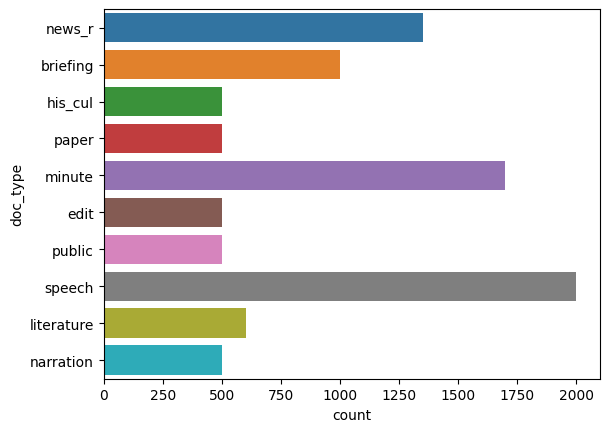

In [149]:
sns.countplot(data=dft, y="doc_type")

#### 데이터 분석

In [42]:
train_data.describe()

,doc_type,doc_name,passage_id,passage
count,1000,1000,1000,1000
unique,10,535,1000,1000
top,news_r,제19대 국회 교육문화체육관광위원회 회의록 데이터셋.csv,REPORT-news_r-00007-00001,보수진영 사분오열 속 ‘국민통합연대’ 띄운 비박계 크리스마스를 앞둔 지난 23일 오...
freq,100,59,1,1


In [43]:
train_data.head()

,doc_type,doc_name,passage_id,passage
0,news_r,"[최상연 논설위원이 간다] 이재오 “무반성 한국당, 무능 지도부…이대론 총선 어렵다”",REPORT-news_r-00007-00001,보수진영 사분오열 속 ‘국민통합연대’ 띄운 비박계 크리스마스를 앞둔 지난 23일 오...
1,news_r,"26세에 14억 빚 얻은 청년, 8년만에 연매출 183억 비결은?",REPORT-news_r-00018-00001,가난 속에서 맨손으로 혼자 창업해 30대 중반에 코스닥 상장까지 일궈낸 이가 있다....
2,news_r,"이통사 장기 가입자 혜택 비교해 보니…VIP일까, 호갱일까",REPORT-news_r-00020-00002,"SK텔레콤은 ‘T끼리 온가족 할인’ 요금제로, 가족 구성원의 가입 합산 기간이..."
3,news_r,자율포장 테이프 없애놓고 1+1 상품엔 둘둘···대형마트의 모순,REPORT-news_r-00024-00001,“박스 테이프는 어디 갔죠?” 1일 오전 서울 중구의 한 대형마트.\n 장을 본 ...
4,news_r,"이달 출시 제네시스 첫 SUV 살짝 공개···전문가들 ""예상대로""",REPORT-news_r-00029-00001,"현대차그룹 고급 브랜드 제네시스의 첫 스포츠유틸리티차량(SUV), GV80이 드디어..."


In [44]:
train_data.tail()

,doc_type,doc_name,passage_id,passage
995,narration,51006_DC_걸어서세계속으로006_2014007630.txt,REPORT-narration-51006-00019,한국과는 정반대다.\n계절의 뒤바뀜을 느껴보는 것도 여행의 또 다른 재미다.\n이곳...
996,narration,51007_DC_걸어서세계속으로007_2014007672.txt,REPORT-narration-51007-00003,1960년대부터는 중국의 박해를 피해 망명한 티베트인들이 이곳을 중심으로 네팔에 정...
997,narration,51007_DC_걸어서세계속으로007_2014007672.txt,REPORT-narration-51007-00004,포카라에서는 어느 곳에서나 안나푸르나 산 문을 볼 수 있다.\n안나푸르나로 가는 길...
998,narration,51007_DC_걸어서세계속으로007_2014007672.txt,REPORT-narration-51007-00007,청년의 친절이 고마웠다.\n주민들은 산비탈을 깎아 만든 계단식 밭에서 겨울에는 주로...
999,narration,51007_DC_걸어서세계속으로007_2014007672.txt,REPORT-narration-51007-00009,부모의 사랑을 받으며 커야 할 8살 나이에 아이가 짊어져야 하는 삶의 무게가 버거워...


In [45]:
train_data["doc_type"].value_counts()

doc_type
news_r        100
briefing      100
his_cul       100
paper         100
minute        100
edit          100
public        100
speech        100
literature    100
narration     100
Name: count, dtype: int64

In [46]:
train_data.isnull().sum()

doc_type      0
doc_name      0
passage_id    0
passage       0
dtype: int64

### 문자 길이

In [47]:
# 학습 데이터의 개수
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

# 결과
# 전체 학습 데이터의 개수: 1000

전체 학습 데이터의 개수: 1000


In [48]:
# 각 passage의 길이를 분석
train_length = train_data['passage'].apply(len)
train_length

0      1204
1      1240
2      1227
3      1285
4      1215
       ... 
995     405
996     418
997     402
998     401
999     419
Name: passage, Length: 1000, dtype: int64

In [80]:
train_length.describe()

count    1000.000000
mean      746.968000
std       237.385186
min       301.000000
25%       669.500000
50%       744.000000
75%       809.250000
max      1489.000000
Name: passage, dtype: float64

In [50]:
# 물음표가 구두점으로 사용되는 비율
qmarks = np.mean(train_data['passage'].apply(lambda x : '?' in x))
# 마침표가 구두점으로 사용되는 비율
fullstop = np.mean(train_data['passage'].apply(lambda x : '.' in x))
# 첫 번째 대문자의 비율
#capital_first = np.mean(train_data['passage'].apply(lambda x : x[0].isupper()))
# 대문자 비율
#capitals = np.mean(train_data['passage'].apply(lambda x : max([y.isupper() for y in x])))
# 숫자 비율
numbers = np.mean(train_data['passage'].apply(lambda x : max([y.isdigit() for y in x])))

print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
#print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
#print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

# 결과
# 물음표가 있는 질문: 21.80%
# 마침표가 있는 질문: 100.00%
# 숫자가 있는 질문: 83.20%

물음표가 있는 질문: 21.80%
마침표가 있는 질문: 100.00%
숫자가 있는 질문: 83.20%


In [52]:
train_data["word_count"] = train_data["passage"].apply(lambda x : len(x.split())) # calculates the number of words in each string in the "title" column
train_data["unique_word_count"] = train_data["passage"].apply(lambda x : len(set(x.split()))) # calculate the number of unique words in each string in the 
train_data.head()

,doc_type,doc_name,passage_id,passage,word_count,unique_word_count
0,news_r,"[최상연 논설위원이 간다] 이재오 “무반성 한국당, 무능 지도부…이대론 총선 어렵다”",REPORT-news_r-00007-00001,보수진영 사분오열 속 ‘국민통합연대’ 띄운 비박계 크리스마스를 앞둔 지난 23일 오...,258,242
1,news_r,"26세에 14억 빚 얻은 청년, 8년만에 연매출 183억 비결은?",REPORT-news_r-00018-00001,가난 속에서 맨손으로 혼자 창업해 30대 중반에 코스닥 상장까지 일궈낸 이가 있다....,279,254
2,news_r,"이통사 장기 가입자 혜택 비교해 보니…VIP일까, 호갱일까",REPORT-news_r-00020-00002,"SK텔레콤은 ‘T끼리 온가족 할인’ 요금제로, 가족 구성원의 가입 합산 기간이...",284,229
3,news_r,자율포장 테이프 없애놓고 1+1 상품엔 둘둘···대형마트의 모순,REPORT-news_r-00024-00001,“박스 테이프는 어디 갔죠?” 1일 오전 서울 중구의 한 대형마트.\n 장을 본 ...,286,235
4,news_r,"이달 출시 제네시스 첫 SUV 살짝 공개···전문가들 ""예상대로""",REPORT-news_r-00029-00001,"현대차그룹 고급 브랜드 제네시스의 첫 스포츠유틸리티차량(SUV), GV80이 드디어...",262,232


### 데이터 전처리

In [113]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
#from tensorflow.python.keras.preprocessing.sequence import pad_sequences
#from tensorflow.python.keras.preprocessing.text import Tokenizer
import nltk

In [82]:
sample_content = train_data["passage"][0]
sample_content

'보수진영 사분오열 속 ‘국민통합연대’ 띄운 비박계 크리스마스를 앞둔 지난 23일 오전 서울 프레스센터 국제회의실.\n  보수분열 극복을 내건 ‘국민통합연대’가 창립대회를 열었다.\n  햇살 없이 착 가라앉은 날씨에 동지 바람이 매서웠지만 행사장 안은 달아올랐다.\n  문재인 정권을 향한 맹폭격이 이어졌고 ‘무능, 기만의 오만방자한 정권에 사망을 선고한다’는 창립선언문이 나왔다.\n  홍준표 전 자유한국당 대표 등 전현직 의원 20여명을 포함해 500여명이 자리를 빼곡하게 메웠다.\n  총선이 불과 석달 남짓이다.\n  야권 인사들이 정권을 두들겨 패는 거야 이상한 일이 아니다.\n  눈 여겨 볼 대목은 모인 사람이 대부분 친이·비박계(친이명박·비박근혜) 인사들이란 점이다.\n  박관용 전 국회의장, 이문열 작가와 함께 보수쪽 명망가 여럿이 이름을 올리고 더러 참석했다.\n  전광훈 목사는 축사를 했다.\n  그래도 이명박 정권서 요직을 맡았던 사람들이 주축이다.\n  이재오 중앙집행위원장과 홍준표 전 대표가 한가운데 있다.\n  두 사람은 ‘친박 그룹’에 둘러싸인 황교안 대표와 한국당에 불편한 기색을 감추지 않는 중이다.\n  홍 전 대표는 이튿날 “무기력한 야당만 믿고 따르기엔 너무 답답하고 앞날이 보이지 않아 창립한 게 국민통합연대”란 글을 올렸다.\n  31일엔 “한국당 지도부는 총사퇴하고 비상대책위를 꾸려야 한다”고 황 대표 사퇴를 요구했다.\n  이재오 위원장은 지난 10월3일 광화문의 조국 규탄집회장에서 “자유한국당은 집회에서 빠지라”고 외쳤다.\n  가뜩이나 뿔뿔이 흩어진 각자도생의 보수세력이다.\n  한국당과 우리공화당에다 새로운 보수당, 이언주 신당, 이정현 신당이 나올 판이다.\n  게다가 개정선거법의 준연동형 비례대표제는 군소정당에 유리한 분열요인이다.\n  중앙선관위에 등록된 정당이 34개인데 창당준비위원회를 설립한 예비정당만 16개에 달한다.\n  야권 빅텐트를 외칠만한 상황이긴 하다.\n  그런데 통합을 내건 이재오 위원장은 “어느 

In [56]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\n', ' ', text)
    #text = re.sub('‘', '', text)
    #text = re.sub('’', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    #text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    # 중복으로 생성된 공백값을 제거합니다.
    text = re.sub(' +', ' ', text)
    return text

In [57]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', 
             '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', 
             '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', 
             '왜','같은', '같습니다', '없습니다', '위해', '한다', 
             '여명', '이다', '에', '고', '란', '는', '그래도', '개에', '개인데', '일엔']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [58]:
# 샘플데이터에 적용
%time pre_sample_content = preprocessing(sample_content)
pre_sample_content

CPU times: total: 0 ns
Wall time: 997 µs


'보수진영 사분오열 속 국민통합연대 띄운 비박계 크리스마스를 앞둔 지난 일 오전 서울 프레스센터 국제회의실 보수분열 극복을 내건 국민통합연대 가 창립대회를 열었다 햇살 없이 착 가라앉은 날씨에 동지 바람이 매서웠지만 행사장 안은 달아올랐다 문재인 정권을 향한 맹폭격이 이어졌고 무능 기만의 오만방자한 정권에 사망을 선고한다 는 창립선언문이 나왔다 홍준표 전 자유한국당 대표 등 전현직 의원 여명을 포함해 여명이 자리를 빼곡하게 메웠다 총선이 불과 석달 남짓이다 야권 인사들이 정권을 두들겨 패는 거야 이상한 일이 아니다 눈 여겨 볼 대목은 모인 사람이 대부분 친이 비박계 친이명박 비박근혜 인사들이란 점이다 박관용 전 국회의장 이문열 작가와 함께 보수쪽 명망가 여럿이 이름을 올리고 더러 참석했다 전광훈 목사는 축사를 했다 그래도 이명박 정권서 요직을 맡았던 사람들이 주축이다 이재오 중앙집행위원장과 홍준표 전 대표가 한가운데 있다 두 사람은 친박 그룹 에 둘러싸인 황교안 대표와 한국당에 불편한 기색을 감추지 않는 중이다 홍 전 대표는 이튿날 무기력한 야당만 믿고 따르기엔 너무 답답하고 앞날이 보이지 않아 창립한 게 국민통합연대 란 글을 올렸다 일엔 한국당 지도부는 총사퇴하고 비상대책위를 꾸려야 한다 고 황 대표 사퇴를 요구했다 이재오 위원장은 지난 월 일 광화문의 조국 규탄집회장에서 자유한국당은 집회에서 빠지라 고 외쳤다 가뜩이나 뿔뿔이 흩어진 각자도생의 보수세력이다 한국당과 우리공화당에다 새로운 보수당 이언주 신당 이정현 신당이 나올 판이다 게다가 개정선거법의 준연동형 비례대표제는 군소정당에 유리한 분열요인이다 중앙선관위에 등록된 정당이 개인데 창당준비위원회를 설립한 예비정당만 개에 달한다 야권 빅텐트를 외칠만한 상황이긴 하다 그런데 통합을 내건 이재오 위원장은 어느 한 정당이나 단체 중 힘 있는 정당 단체를 중심으로 뭘 하자는 식의 통합은 어렵다 고 주장했다 황교안 대표와 한국당 중심의 보수 통합론을 가로막고 나선 셈이다 그렇다고 힘 있는 한국당이 힘 없는 국민통합

In [59]:
%time train_data['content_preprocessing'] = train_data['passage'].apply(preprocessing)

CPU times: total: 31.2 ms
Wall time: 64.2 ms


In [60]:
%time pre_sample_content = remove_stopwords(pre_sample_content)

CPU times: total: 0 ns
Wall time: 0 ns


In [61]:
%time train_data['content_preprocessed'] = train_data['content_preprocessing'].apply(remove_stopwords)

CPU times: total: 46.9 ms
Wall time: 71.6 ms


In [120]:
%time test_data['content_preprocessing'] = test_data['passage'].apply(preprocessing)
%time test_data['content_preprocessed'] = test_data['content_preprocessing'].apply(remove_stopwords)
test_data.head()

CPU times: total: 609 ms
Wall time: 645 ms
CPU times: total: 531 ms
Wall time: 681 ms


,doc_type,doc_name,passage_id,passage,content_preprocessing,content_preprocessed
0,news_r,[마음 읽기] 새해의 첫 마음,REPORT-news_r-00003-00001,새해가 밝았다.\n 또 다른 한 해가 시작되었다.\n 눈이 내린 하얀 설원이 앞...,새해가 밝았다 또 다른 한 해가 시작되었다 눈이 내린 하얀 설원이 앞에 펼쳐져 있는...,새해가 밝았다 또 다른 해가 시작되었다 눈이 내린 하얀 설원이 앞에 펼쳐져 느낌이다...
1,news_r,"'남의 팔 가진 사나이' 3년의 행복···""8월엔 아빠 됩니다""",REPORT-news_r-00015-00001,"""기다리던 새해가 밝았네요.\n 올해 제가 드디어 아빠가 됩니다.\n "" 국내에서...",기다리던 새해가 밝았네요 올해 제가 드디어 아빠가 됩니다 국내에서 처음으로 남의 ...,기다리던 새해가 밝았네요 올해 제가 드디어 아빠가 됩니다 국내에서 처음으로 남의 ...
2,news_r,"새 전략무기 언급한 김정은···""조만간 전략잠수함 진수식 첩보""",REPORT-news_r-00028-00001,김정은 국무위원장이 지난달 28일부터 31일까지 열린 노동당 중앙위원회 전원회의 ...,김정은 국무위원장이 지난달 일부터 일까지 열린 노동당 중앙위원회 전원회의 보고에서...,김정은 국무위원장이 지난달 일부터 일까지 열린 노동당 중앙위원회 전원회의 보고에서...
3,news_r,“경선 밀리신거냐” 그 말에···예비후보 벌써 등록한 현역 8명,REPORT-news_r-00032-00002,"신 의원은 ""총선에 제가 다시 도전한다는 의사표시로 예비후보를 등록했다""고 말했다...",신 의원은 총선에 제가 다시 도전한다는 의사표시로 예비후보를 등록했다 고 말했다 ...,신 의원은 총선에 제가 다시 도전한다는 의사표시로 예비후보를 등록했다 말했다 다른...
4,news_r,"손등에 칩 심고 결제하는 나라 스웨덴, 돌연 ""현금 지키자"" 왜",REPORT-news_r-00058-00001,스웨덴에서는 지갑을 몸에 지니지 않아도 일상생활에 불편을 겪지 않는 이들이 있다.\...,스웨덴에서는 지갑을 몸에 지니지 않아도 일상생활에 불편을 겪지 않는 이들이 있다 엄...,스웨덴에서는 지갑을 몸에 지니지 않아도 일상생활에 불편을 겪지 않는 이들이 있다 엄...


## TF-IDF Vectorizing

### 학습, 시험 데이터 세트 분리

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char', sublinear_tf=True, ngram_range=(1,3), max_features=5000)

X = vectorizer.fit_transform(train_data['content_preprocessing'])
X

<1000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 580887 stored elements in Compressed Sparse Row format>

In [121]:
train_data.shape, test_data.shape

((1000, 8), (9150, 6))

In [122]:
X_train = train_data["content_preprocessed"]
X_test = test_data["content_preprocessed"]

X_train.shape, X_test.shape

((1000,), (9150,))

In [ ]:
y_train = train_data["content_preprocessed"]
y_train.value_counts()
y_train.shape

(1000,)

In [124]:
y_test = test_data["doc_type"]
y_test.value_counts()
y_test.shape

(9150,)

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=None, 
                             ngram_range=(1,2),
                             min_df=3, 
                             max_df=0.95)
tfidf_vect.fit(X_train)

TfidfVectorizer(max_df=0.95, min_df=3, ngram_range=(1, 2))

In [126]:
train_feature_tfidf = tfidf_vect.transform(X_train)
test_feature_tfidf = tfidf_vect.transform(X_test)

train_feature_tfidf.shape, test_feature_tfidf.shape

((1000, 9663), (9150, 9663))

In [127]:
# 단어 사전
vocab = tfidf_vect.get_feature_names_out()
print(len(vocab))
vocab[:10]

9663


array(['ai', 'ai사이버보안전공', 'ai사이버보안전공 ict융합콘텐츠전공', 'a씨', 'a씨가', 'a씨는',
       'a씨의', 'big', 'b씨에게', 'ceo'], dtype=object)

In [128]:
# np.sum 으로 위에서 구한 train_feature_vector 의 값을 모두 더한다. axis=0 으로 한다. 
dist = np.sum(train_feature_tfidf, axis=0)

vocab_count = pd.DataFrame(dist, columns=vocab)
vocab_count

,ai,ai사이버보안전공,ai사이버보안전공 ict융합콘텐츠전공,a씨,a씨가,a씨는,a씨의,big,b씨에게,ceo,...,희망을 주는,희망의,힘과,힘든,힘들,힘들다,힘써,힘을,힘이,힘입어
0,1.22243,0.216108,0.216108,0.528046,0.354233,0.885987,0.451939,0.445932,0.344046,0.355791,...,0.186129,0.334234,0.337063,1.31937,0.427282,0.438087,0.490809,1.379312,0.553128,0.507058


<Axes: >

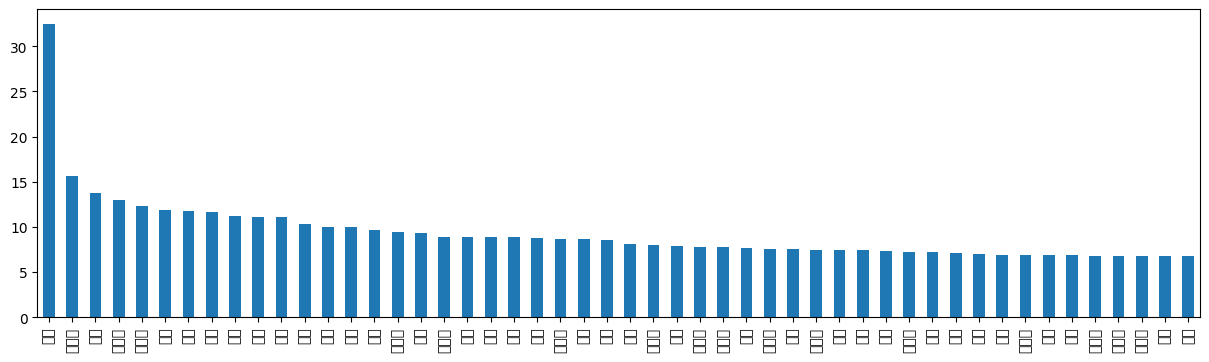

In [129]:
# 위에서 구한 빈도수를 그래프로 그린다.
vocab_count.T[0].sort_values(ascending=False).head(50).plot.bar(figsize=(15, 4))

### 학습과 예측

In [112]:
# RandomForestClassifier 를 불러온다.
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=42)
model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# 문장분리
!pip install kss 
import kss

In [63]:
for sent in kss.split_sentences(pre_sample_content):
    print(sent)

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



보수진영 사분오열 속 국민통합연대 띄운 비박계 크리스마스를 앞둔 지난 오전 서울 프레스센터 국제회의실 보수분열 극복을 내건 국민통합연대 가 창립대회를 열었다 햇살 없이 착 가라앉은 날씨에 동지 바람이 매서웠지만 행사장 안은 달아올랐다
문재인 정권을 향한 맹폭격이 이어졌고 무능 기만의 오만방자한 정권에 사망을 선고한다 창립선언문이 나왔다
홍준표 전 자유한국당 대표 전현직 의원 여명을 포함해 여명이 자리를 빼곡하게 메웠다 총선이 불과 석달 남짓이다 야권 인사들이 정권을 두들겨 패는 거야
이상한 일이 아니다 눈 여겨 볼 대목은 모인 사람이 대부분 친이 비박계 친이명박 비박근혜 인사들이란 점이다
박관용 전 국회의장 이문열 작가와 함께 보수쪽 명망가 여럿이 이름을 올리고 더러 참석했다
전광훈 목사는 축사를 했다
이명박 정권서 요직을 맡았던 사람들이 주축이다 이재오 중앙집행위원장과 홍준표 전 대표가 한가운데 있다 두 사람은 친박 그룹 둘러싸인 황교안 대표와 한국당에 불편한 기색을 감추지 않는 중이다 홍 전 대표는 이튿날 무기력한 야당만 믿고 따르기엔 너무 답답하고 앞날이 보이지 않아 창립한 게 국민통합연대 글을 올렸다
한국당 지도부는 총사퇴하고 비상대책위를 꾸려야 황 대표 사퇴를 요구했다
이재오 위원장은 지난 광화문의 조국 규탄집회장에서 자유한국당은 집회에서 빠지라 외쳤다
가뜩이나 뿔뿔이 흩어진 각자도생의 보수세력이다
한국당과 우리공화당에다 새로운 보수당 이언주 신당 이정현 신당이 나올 판이다
게다가 개정선거법의 준연동형 비례대표제는 군소정당에 유리한 분열요인이다
중앙선관위에 등록된 정당이 창당준비위원회를 설립한 예비정당만 달한다 야권 빅텐트를 외칠만한 상황이긴 하다
그런데 통합을 내건 이재오 위원장은 어느 정당이나 단체 중 힘 정당 단체를 중심으로 뭘 하자는 식의 통합은 어렵다 주장했다
황교안 대표와 한국당 중심의 보수 통합론을 가로막고 나선 셈이다
그렇다고 힘 한국당이 힘 국민통합연대의 주문에 따를 리는 없다
결국 친이계가 떨어져 나가는 보수 분열 이란 해석이 나왔다

In [76]:
!pip install konlpy

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['content_preprocessed'])
text_sequences = tokenizer.texts_to_sequences(train_data['content_preprocessed'])

In [ ]:
word_vocab = tokenizer.word_index
#print(word_vocab)
print('전체 단어 개수:', len(word_vocab))

In [ ]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size']=len(word_vocab)+1

### 단어 벡터화하기

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2, 
                             ngram_range=(1, 3),
                             max_features = 2000
                            )
vectorizer

CountVectorizer(max_features=2000, min_df=2, ngram_range=(1, 3))

In [91]:
%%time 
train_feature_vector = vectorizer.fit_transform(train_data['content_preprocessing'])
train_feature_vector.shape

CPU times: total: 938 ms
Wall time: 1.02 s


(1000, 2000)

In [92]:
vocab = vectorizer.get_feature_names_out()
print(len(vocab))
vocab[:10]

2000


array(['ai', 'a씨는', 'dj', 'esg', 'imf', 'ioi', 'jp', 'km', 'kr', 'lh'],
      dtype=object)

In [93]:
dist = np.sum(train_feature_vector, axis=0)

pd.DataFrame(dist, columns=vocab)

,ai,a씨는,dj,esg,imf,ioi,jp,km,kr,lh,...,후보를,후보와,후보의,후에,훈련,훨씬,흐르는,흔히,힘든,힘을
0,13,12,16,26,13,10,12,15,11,30,...,33,17,41,33,11,27,14,13,14,12


In [94]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [95]:
tokened_title = tokenizer.tokenize(train_data['content_preprocessed'][0])
#tokened_title

In [96]:
dtm_cv = cv.fit_transform(train_data["content_preprocessed"])

In [97]:
# 주어진 문서에 대하여 각 문서에 어떤 주제들이 존재하는지를 확인하는 잠재 디리클레 분석(LDA)을 불러옴
# n_components에 넣을 하이퍼파라미터 NUM_TOPICS로 주제수를 설정(기본값=10)
# max_iter는 훈련 데이터(epoch라고도 함)에 대한 최대 패스 수(기본값=10)

from sklearn.decomposition import LatentDirichletAllocation

NUM_TOPICS = 10
LDA_model = LatentDirichletAllocation(n_components=NUM_TOPICS, random_state=42)

In [98]:
# LDA_model 에 dtm_cv 를 넣어 학습
LDA_model.fit(dtm_cv)

LatentDirichletAllocation(random_state=42)

In [99]:
#pip install pyldavis

In [100]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim


In [102]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()